# Bildverarbeitung Evaluation

In [47]:
import ImageHandler as ih
from ImageHandler import cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [48]:
csvFile = 'extracsvAll.csv'
test_df = pd.read_csv(csvFile)

In [49]:
test_df.head()

,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner,type
0,26,0.004413,0.379250,1.003808,3,65806,434,254.011059,-2.810088,2.710155,1.045454,-8.246211,1.020743,0.554420,0.970142,0.669933,0.978365,5.099020,Dosenoeffner
1,27,0.062218,0.442046,1.073125,2,29660,432,240.198330,-0.998737,2.002529,1.673469,24.331050,1.249528,0.650614,0.954057,0.499288,0.978225,30.232433,Korkenzieher
2,20,0.109854,0.498771,1.251264,2,7145,418,228.538098,7.272945,3.037383,1.585366,23.769729,1.516755,0.910871,0.951853,0.739691,0.964045,16.278821,Flaschenoeffner
3,20,0.013830,0.253412,1.522871,3,27976,322,249.384412,7.473587,1.616767,1.802632,-0.000000,0.277719,0.761132,0.958875,0.718056,0.963532,17.720045,Dosenoeffner
4,19,0.008913,0.401001,1.051924,2,56244,407,252.974080,4.510240,2.314801,1.208333,-7.615773,1.008971,0.670125,0.964847,0.648434,0.975986,19.235384,Dosenoeffner


In [50]:
test_df.head(20)

,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner,type
0,26,0.004413,0.379250,1.003808,3,65806,434,254.011059,-2.810088,2.710155,1.045454,-8.246211,1.020743,0.554420,0.970142,0.669933,0.978365,5.099020,Dosenoeffner
1,27,0.062218,0.442046,1.073125,2,29660,432,240.198330,-0.998737,2.002529,1.673469,24.331050,1.249528,0.650614,0.954057,0.499288,0.978225,30.232433,Korkenzieher
2,20,0.109854,0.498771,1.251264,2,7145,418,228.538098,7.272945,3.037383,1.585366,23.769729,1.516755,0.910871,0.951853,0.739691,0.964045,16.278821,Flaschenoeffner
3,20,0.013830,0.253412,1.522871,3,27976,322,249.384412,7.473587,1.616767,1.802632,-0.000000,0.277719,0.761132,0.958875,0.718056,0.963532,17.720045,Dosenoeffner
4,19,0.008913,0.401001,1.051924,2,56244,407,252.974080,4.510240,2.314801,1.208333,-7.615773,1.008971,0.670125,0.964847,0.648434,0.975986,19.235384,Dosenoeffner
5,18,0.102716,0.484502,1.110350,2,7794,310,230.201670,6.756757,3.700000,1.562902,29.698485,1.478801,0.897972,0.947762,0.836818,0.927941,10.630146,Flaschenoeffner
6,17,0.172914,0.316463,1.072247,2,8871,422,213.899019,5.771130,2.868233,12.244010,25.806976,0.886091,0.882009,0.926568,0.832971,0.841012,18.027756,Dosenoeffner
7,19,0.081485,0.513091,1.141902,2,11560,370,235.448996,2.227021,3.175124,1.591228,14.866069,1.547348,0.902523,0.931972,0.670569,0.900344,8.062258,Flaschenoeffner
8,22,0.006932,0.366211,0.935732,2,56989,506,253.451836,-5.542478,2.345521,1.090909,-6.324555,0.796126,0.623279,0.964970,0.575627,0.974359,25.806976,Dosenoeffner
9,18,0.310303,0.339618,1.244580,3,9427,417,132.730945,8.944174,2.236092,3.328125,29.000000,0.942559,0.916956,0.944323,0.773044,0.764716,20.248457,Flaschenoeffner


In [51]:
test_df.columns 

Index(['approxAnzahl', 'areaRatio', 'circleLike', 'contureDistance',
       'conturenAnzahl', 'farPoint', 'keyPointsAnzahl', 'mean_val',
       'middlepointDistance', 'minimal_ratio', 'minimal_ratio2',
       'momentpointDistance', 'rectangleLike', 'seradity', 'seradity2',
       'solidity', 'solidity2', 'steiner', 'type'],
      dtype='object')

In [52]:
test_df.describe()

,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,20.945479,0.250186,0.379473,1.141619,4.033245,24313.871011,408.986702,236.061220,20.118545,2.515270,2.379567,39.536727,1.038357,0.778321,0.893803,0.691337,0.848547,22.186489
std,7.038676,0.363307,0.157934,0.267939,3.935933,22626.428209,63.781041,21.161172,57.418297,1.084067,2.035359,61.337702,0.498986,0.138587,0.106376,0.177150,0.179894,20.604134
min,4.000000,0.000291,0.015558,0.605768,1.000000,0.000000,180.000000,132.730945,-32.464400,1.000000,1.000000,-36.400549,0.075527,0.298228,0.435686,0.278405,0.112315,0.000000
25%,17.000000,0.031198,0.295845,0.986322,2.000000,7860.750000,384.750000,227.936896,0.263748,1.657645,1.415874,7.778175,0.735257,0.658373,0.879219,0.577773,0.818046,7.810250
50%,21.000000,0.077850,0.388052,1.104482,3.000000,18001.500000,425.000000,241.121008,6.468045,2.376068,1.756980,29.008618,1.040780,0.783725,0.943555,0.693842,0.927701,16.763055
75%,26.000000,0.196946,0.482143,1.262304,5.000000,35320.000000,445.000000,252.284380,15.281609,3.079847,2.547989,44.102154,1.357889,0.903646,0.958875,0.814004,0.971799,27.266971
max,44.000000,1.000000,0.846259,2.501068,31.000000,156931.000000,539.000000,255.000000,299.000000,7.932414,26.000000,299.000000,2.825753,1.000000,1.000000,1.000000,1.000000,108.461975


In [53]:
test_df.shape #anzahl Datensätze udn Spalten

(752, 19)

Scatterplot von 2 Merkmalen um Klassifikation zu beurteilen

In [54]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

Text(0, 0.5, 'Zweites')

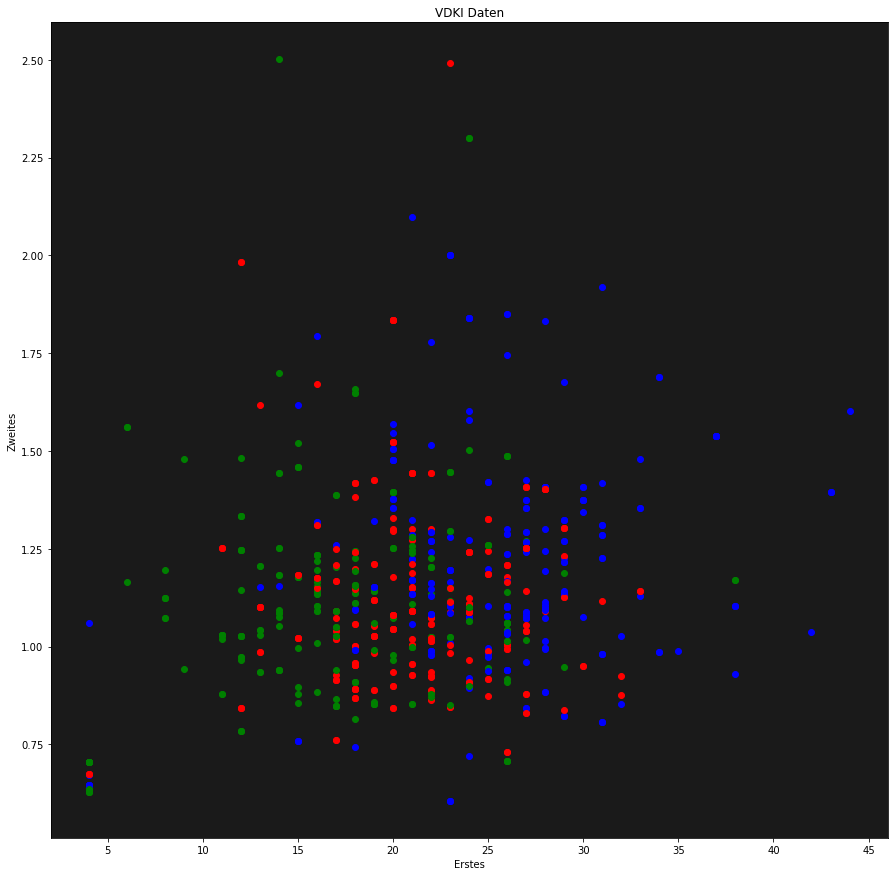

In [55]:
fig, ax = plt.subplots(figsize=(15,15)) #Größe Plot  konfigurieren


for i  in range(len(test_df['type'])):
    ax.scatter(test_df['approxAnzahl'][i],
               test_df['contureDistance'][i],
               color=colors[test_df['type'][i]])
    
ax.set_title('VDKI Daten')
ax.set_facecolor((0.1,0.1,0.1))
ax.set_xlabel('Erstes')
ax.set_ylabel('Zweites')

Klassen statt mit Namen mit Zahlen bezeichnen

In [56]:
test_original_df = test_df #alten dataframe sichern

In [57]:
type_to_int ={'Dosenoeffner':0,'Flaschenoeffner':1, 'Korkenzieher':2} # Für jede Klasse eindeutige Zahl setzen

test_df['type']=test_df['type'].map(type_to_int) # Klassenspalte überschreiben mit Zahlen
test_df.head()

,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner,type
0,26,0.004413,0.379250,1.003808,3,65806,434,254.011059,-2.810088,2.710155,1.045454,-8.246211,1.020743,0.554420,0.970142,0.669933,0.978365,5.099020,0
1,27,0.062218,0.442046,1.073125,2,29660,432,240.198330,-0.998737,2.002529,1.673469,24.331050,1.249528,0.650614,0.954057,0.499288,0.978225,30.232433,2
2,20,0.109854,0.498771,1.251264,2,7145,418,228.538098,7.272945,3.037383,1.585366,23.769729,1.516755,0.910871,0.951853,0.739691,0.964045,16.278821,1
3,20,0.013830,0.253412,1.522871,3,27976,322,249.384412,7.473587,1.616767,1.802632,-0.000000,0.277719,0.761132,0.958875,0.718056,0.963532,17.720045,0
4,19,0.008913,0.401001,1.051924,2,56244,407,252.974080,4.510240,2.314801,1.208333,-7.615773,1.008971,0.670125,0.964847,0.648434,0.975986,19.235384,0


Daten Visualieren, Merkmale und Kategorien

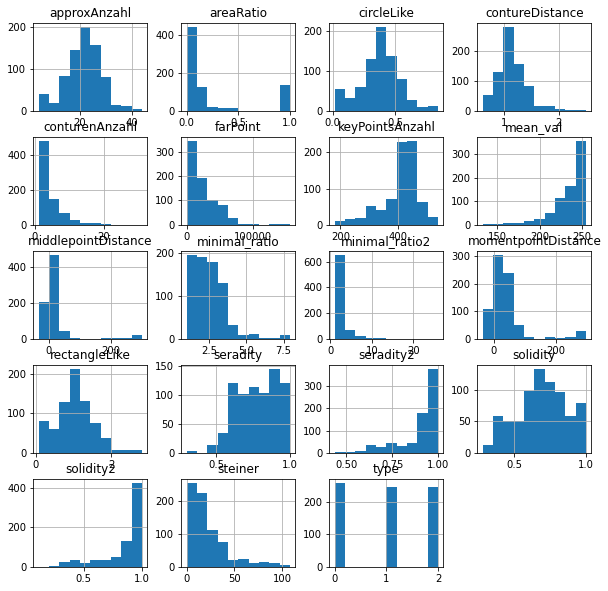

In [58]:
test_df.hist(figsize=(10,10)) #berechnet Histogramme aller Spalten
plt.show()

Scattermatrix erstellen als schnellen Überblick

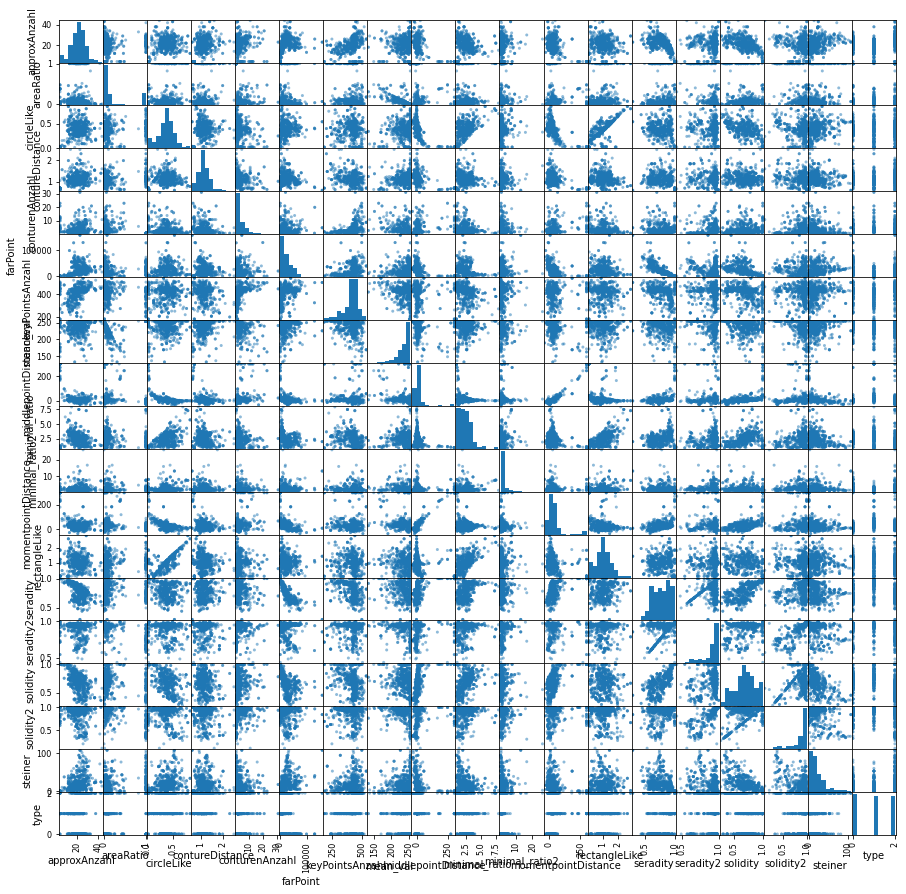

In [59]:
from pandas.plotting import scatter_matrix
scatter_matrix(test_df,figsize=(15,15))
plt.show()

Erzeuge Trainings- und Testdaten
1. Erzeuge eine Dataframe mit allen Merkmalen, aber nicht der Kategorie (Letzte Spalte)
2. Erzeuge eine Dataframe nur mit der Kategorie (letzte Spalte)

In [60]:
X = test_df.iloc[:,:-1] #alles außer letzter Spalte
y = test_df.iloc[:,-1] #nur letzte Spalte
print('X: ',X.shape, ' y: ',y.shape)

X:  (752, 18)  y:  (752,)


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   random_state=42)

print('X_train: ', X_train.shape, ' y_train: ',y_train.shape)
print('X_test: ', X_test.shape, ' y_test: ', y_test.shape)

X_train:  (601, 18)  y_train:  (601,)
X_test:  (151, 18)  y_test:  (151,)


Bayes Klassifikator

In [62]:
from sklearn.naive_bayes import GaussianNB # importiere Bayes-Klassifikator
bayes_clf = GaussianNB()
bayes_clf.fit(X_train,y_train) #Wende Klassifikator auf Trainingsdaten an

print('Accuracy Bayes: ', bayes_clf.score(X_test, y_test))

Accuracy Bayes:  0.6754966887417219


Accuracy = 1: Kann komplett genau klassifizieren

Weitere Maße außer Accuracy:

In [63]:
from sklearn.metrics import confusion_matrix

y_pred = bayes_clf.predict(X_test) #nimm Testdaten als Vorhersagedaten

print(confusion_matrix(y_test, y_pred))

[[44  4  4]
 [ 6 30  4]
 [28  3 28]]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.85      0.68        52
           1       0.81      0.75      0.78        40
           2       0.78      0.47      0.59        59

    accuracy                           0.68       151
   macro avg       0.72      0.69      0.68       151
weighted avg       0.71      0.68      0.67       151



Entscheidungsbaum

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
print('Accuracy Decision Tree', tree_clf.score(X_test,y_test)) # Accuracy nach Generalisierung

Accuracy Decision Tree 0.9536423841059603


In [67]:
y_pred = tree_clf.predict(X_test) #Vorhesage der X_testdaten erzeugen
# hier könnten statt X_test auch andere Dataframes stehen

from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test,y_pred)) #Vergleich Prädiktion mit Test

Accuracy: 0.9536423841059603


[Text(495.0733695652174, 784.0384615384615, 'X[13] <= 0.849\ngini = 0.666\nsamples = 601\nvalue = [206, 206, 189]'),
 Text(267.6277173913043, 721.3153846153846, 'X[9] <= 2.011\ngini = 0.593\nsamples = 376\nvalue = [168, 42, 166]'),
 Text(145.56521739130434, 658.5923076923077, 'X[5] <= 44430.5\ngini = 0.384\nsamples = 152\nvalue = [26, 10, 116]'),
 Text(97.04347826086956, 595.8692307692307, 'X[15] <= 0.717\ngini = 0.267\nsamples = 126\nvalue = [9, 10, 107]'),
 Text(60.65217391304348, 533.1461538461538, 'X[15] <= 0.53\ngini = 0.185\nsamples = 119\nvalue = [3, 9, 107]'),
 Text(24.26086956521739, 470.4230769230769, 'X[12] <= 1.326\ngini = 0.025\nsamples = 78\nvalue = [0, 1, 77]'),
 Text(12.130434782608695, 407.7, 'gini = 0.0\nsamples = 72\nvalue = [0, 0, 72]'),
 Text(36.391304347826086, 407.7, 'X[13] <= 0.656\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(24.26086956521739, 344.9769230769231, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(48.52173913043478, 344.9769230769231,

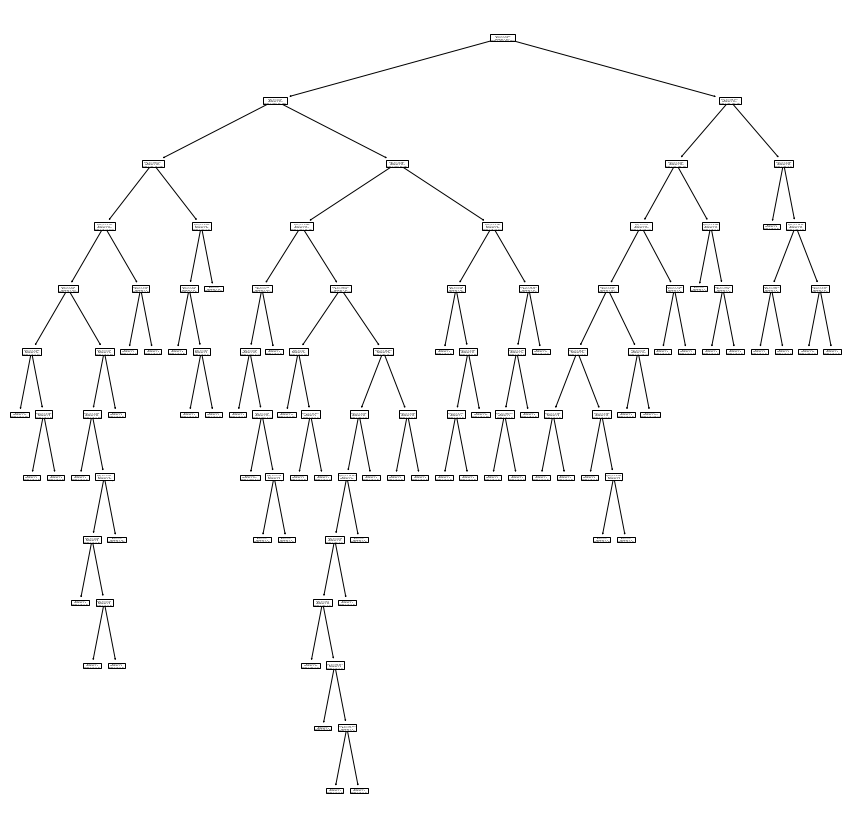

In [68]:
plt.figure(figsize=(15,15))
tree.plot_tree(tree_clf,)

Decision Tree anwenden